In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from py_vollib.black_scholes.implied_volatility import implied_volatility

K = 1000
S = 500


In [2]:
S = 500
r = 0.05 # Rate for > 122 day
K = 1000
T = 1
def implied_vol_catch(P, S, k, T, r):
    try:
        vol = implied_volatility(P, S, k, T, r, 'c')
    except:
        return -1
    return vol

sample5 = list(filter(lambda x: x[1] > 0, [(P, implied_vol_catch(P, S, 8 * K, T, r) )for P in range(0,10_000)]))
sample4 = list(filter(lambda x: x[1] > 0, [(P, implied_vol_catch(P, S, 4 * K, T, r) )for P in range(0,10_000)]))
sample1 = list(filter(lambda x: x[1] > 0, [(P, implied_vol_catch(P, S, K, T, r) )for P in range(0,10_000)]))
sample2 = list(filter(lambda x: x[1] > 0, [(P, implied_vol_catch(P, S, 0.25 * K, T, r) )for P in range(0,10_000)]))
sample3 = list(filter(lambda x: x[1] > 0, [(P, implied_vol_catch(P, S, 0.125 * K, T, r) )for P in range(0,10_000)]))

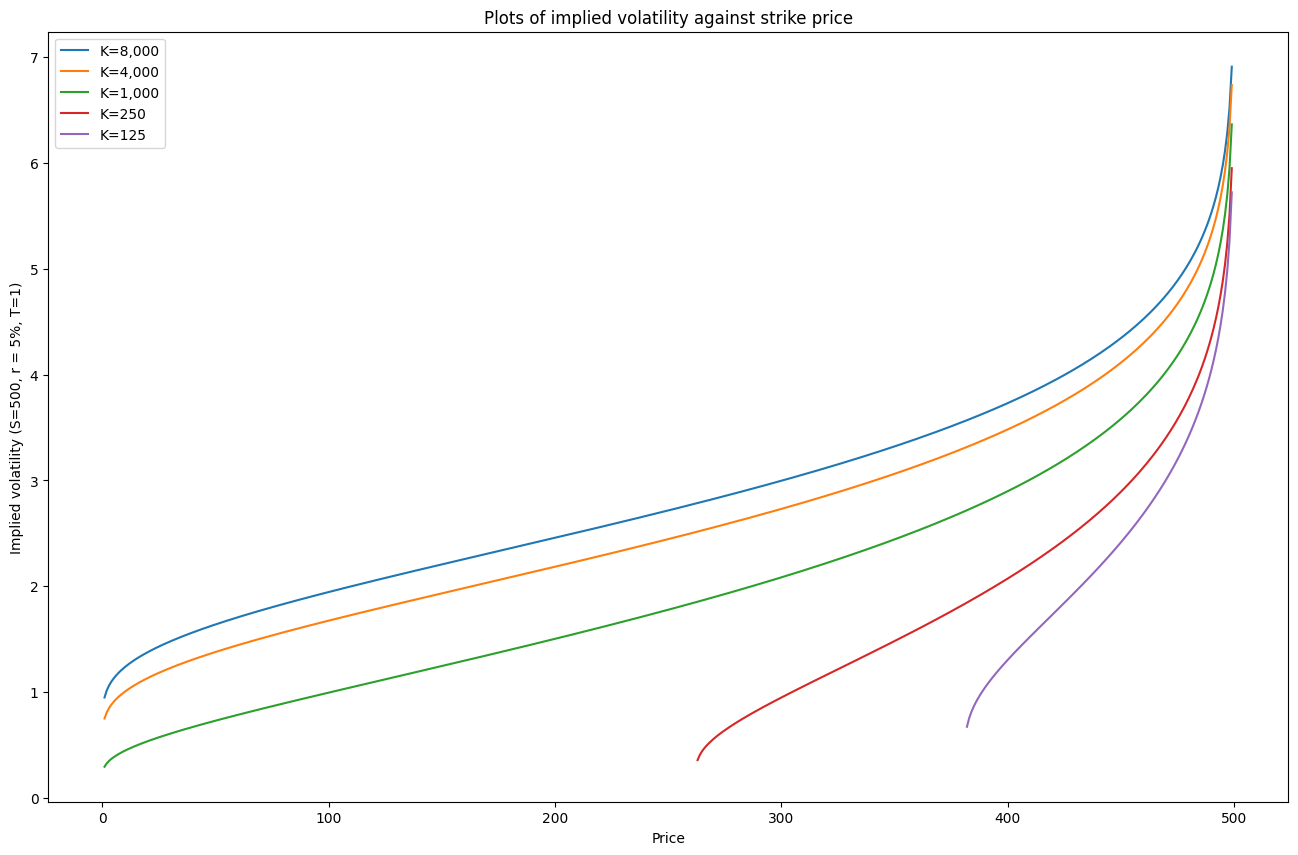

In [3]:
def get(sample):
    return [x[0] for x in sample], [x[1] for x in sample]
plt.figure(figsize=(16,10))
plt.plot(*get(sample5), label='K=8,000')
plt.plot(*get(sample4), label='K=4,000')
plt.plot(*get(sample1), label='K=1,000')
plt.plot(*get(sample2), label='K=250')
plt.plot(*get(sample3), label='K=125')
plt.title('Plots of implied volatility against strike price')
plt.xlabel("Price")
plt.ylabel("Implied volatility (S=500, r = 5%, T=1)")
plt.legend(loc='upper left')


In [4]:
def svi(xs, a,b,c,m,s):
    return a + b*(c * (xs - m) + np.sqrt((xs-m)**2 + s))

def svi_sub(xs, a, b, c, m ,s):
    return b * ((xs - m) / np.sqrt((xs - m) ** 2 + s) + c)

def svi_sub2(xs, a, b, c, m ,s):
    return b * s / (np.sqrt((xs - m) ** 2 + s) ** 3)

def g_svi(a, b, c, m , s):
    w = lambda x: svi(x, a, b, c, m ,s)
    wsub = lambda x: svi_sub(x, a, b, c, m ,s)
    wsub2 = lambda x: svi_sub2(x, a, b, c, m ,s)
    term1 = lambda x: (1 - (x * wsub(x) / (2 * w(x))))**2
    term2 = lambda x: ((wsub(x)**2)/4) * (1 / w(x) + 1/4)
    term3 = lambda x: wsub2(x) / 2
    return lambda x: term1(x) - term2(x) + term3(x)

In [5]:
# Axel Vogt Curve
a = -0.0410
b = 0.1331
m = 0.3586
rho = 0.3060
sig = 0.4153
axel_svi = lambda k: svi(k, a, b, rho, m, sig**2)
axel_svi_g = g_svi(a, b, rho, m, sig**2)

In [6]:
xs = np.arange(3000)/1000 - 1.5

Text(0.5, 1.0, 'The Axel Vogt Smile')

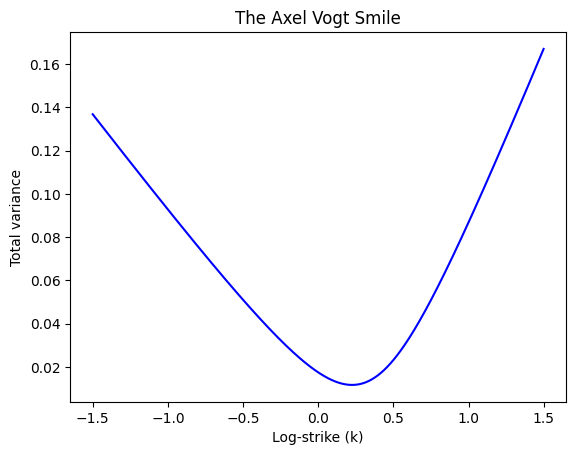

In [23]:
plt.plot(xs, axel_svi(xs), color='blue')
plt.xlabel('Log-strike (k)')
plt.ylabel('Total variance')
plt.title('The Axel Vogt Smile')

Text(0.5, 1.0, 'Corresponding g(k) to the Axel Vogt Smile')

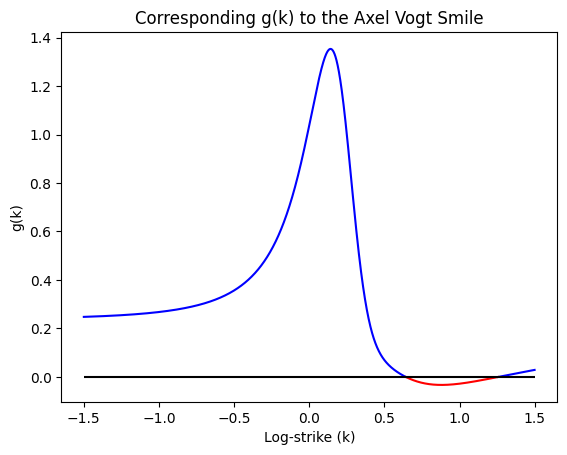

In [25]:
neg_xs = list(filter(lambda x: x[1] < 0, zip(xs,axel_svi_g(xs))))
til = round(min(list(zip(*neg_xs))[0]) * 1000 + 1500)
frm = round(max(list(zip(*neg_xs))[0]) * 1000 + 1500)
plt.plot(xs[:til], axel_svi_g(xs)[:til], color='blue')
plt.plot(xs[frm:], axel_svi_g(xs)[frm:], color='blue')
plt.plot(*(zip(*neg_xs)), color='red')
plt.hlines(0,-1.5,1.5, color='black')
plt.xlabel('Log-strike (k)')
plt.ylabel('g(k)')
plt.title('Corresponding g(k) to the Axel Vogt Smile')

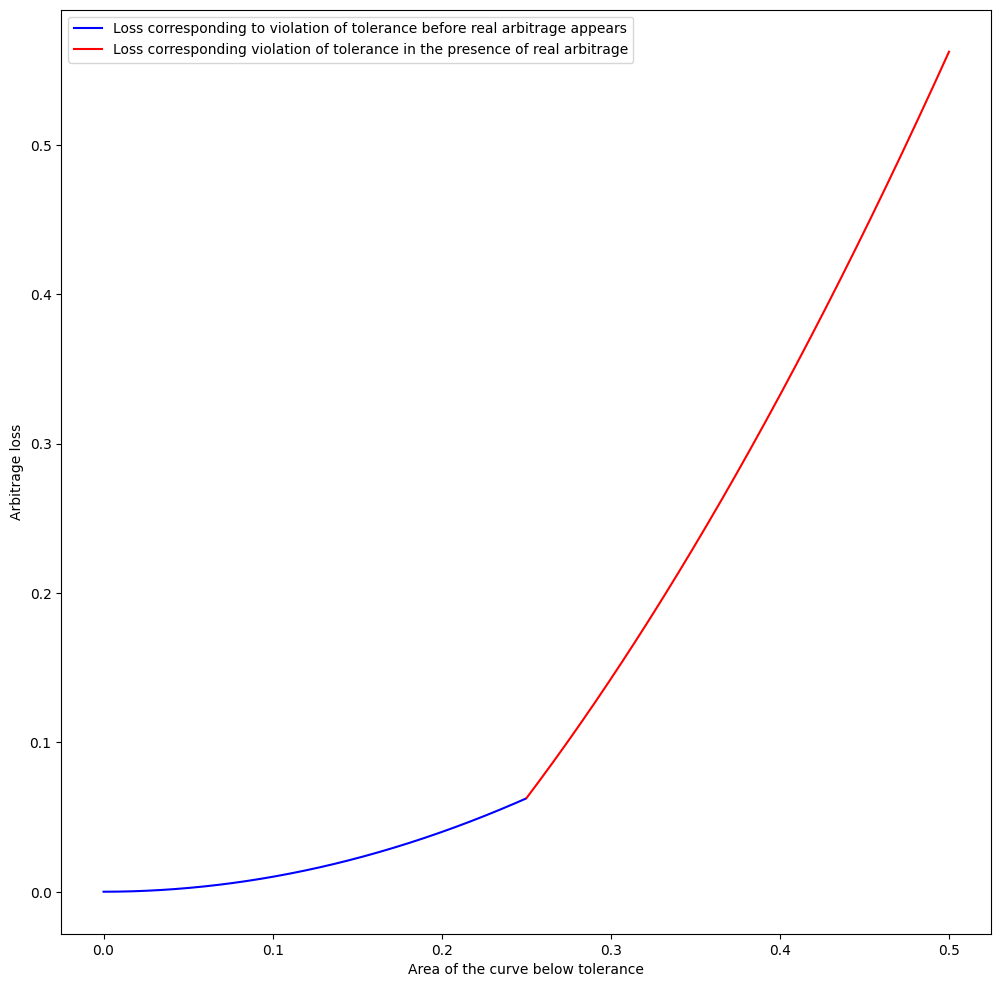

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
xs = np.linspace(0, 0.5, 1000)
l1 = lambda x: 1 * (x)**2
l2 = lambda x: (x-0.25)**2 + (x-0.25)
plt.plot(xs[xs < 0.25], l1(xs[xs<0.25]), color='blue', label='Loss corresponding to violation of tolerance before real arbitrage appears')
plt.plot(xs[xs > 0.25], l1(xs[xs > 0.25]) + l2(xs[xs > 0.25]), color='red',label='Loss corresponding violation of tolerance in the presence of real arbitrage')
plt.legend(loc='upper left')
plt.xlabel('Area of the curve below tolerance')
plt.ylabel('Arbitrage loss')
plt.savefig('arb_loss_example.png')

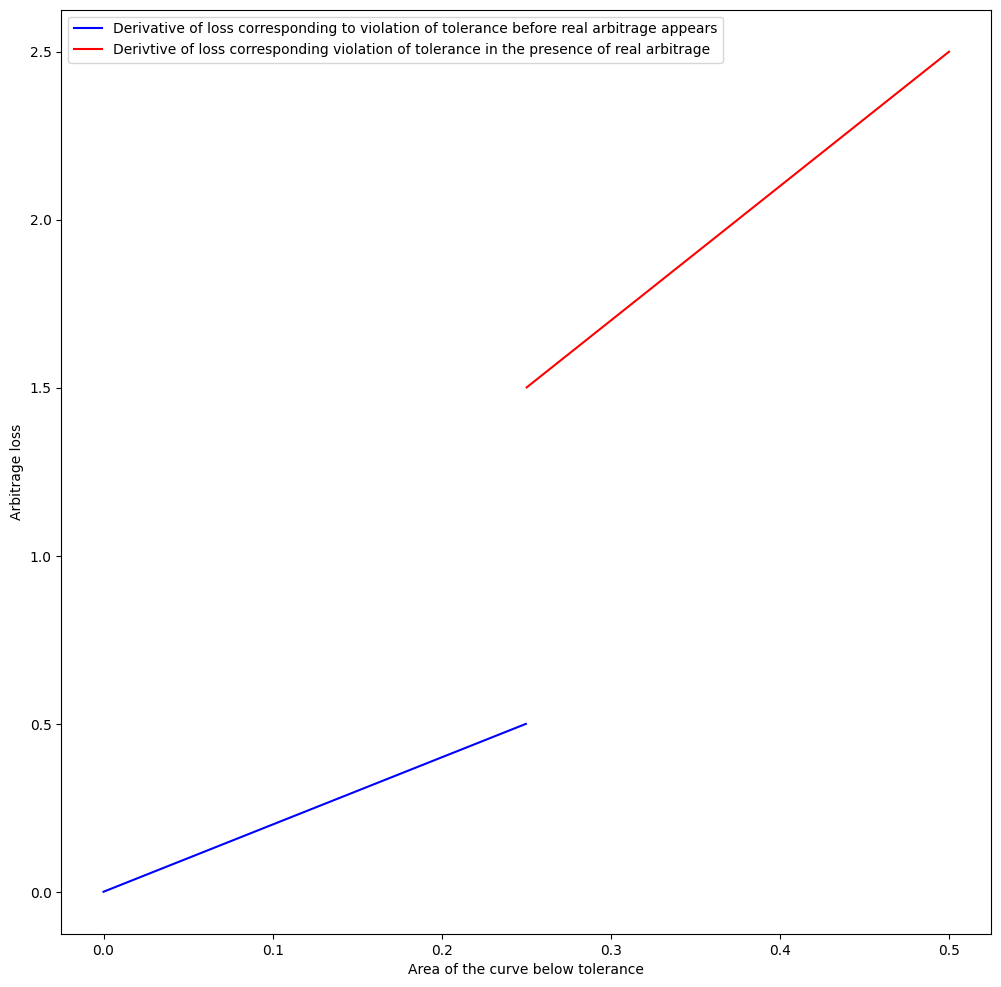

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
xs = np.linspace(0, 0.5, 1000)
l1 = lambda x: 2 * x
l2 = lambda x: 2 * (x-0.25) + 1
plt.plot(xs[xs < 0.25], l1(xs[xs<0.25]), color='blue', label='Derivative of loss corresponding to violation of tolerance before real arbitrage appears')
plt.plot(xs[xs > 0.25], l1(xs[xs > 0.25]) + l2(xs[xs > 0.25]), color='red',label='Derivtive of loss corresponding violation of tolerance in the presence of real arbitrage')
plt.legend(loc='upper left')
plt.xlabel('Area of the curve below tolerance')
plt.ylabel('Arbitrage loss')
plt.savefig('arb_loss_der_example.png')

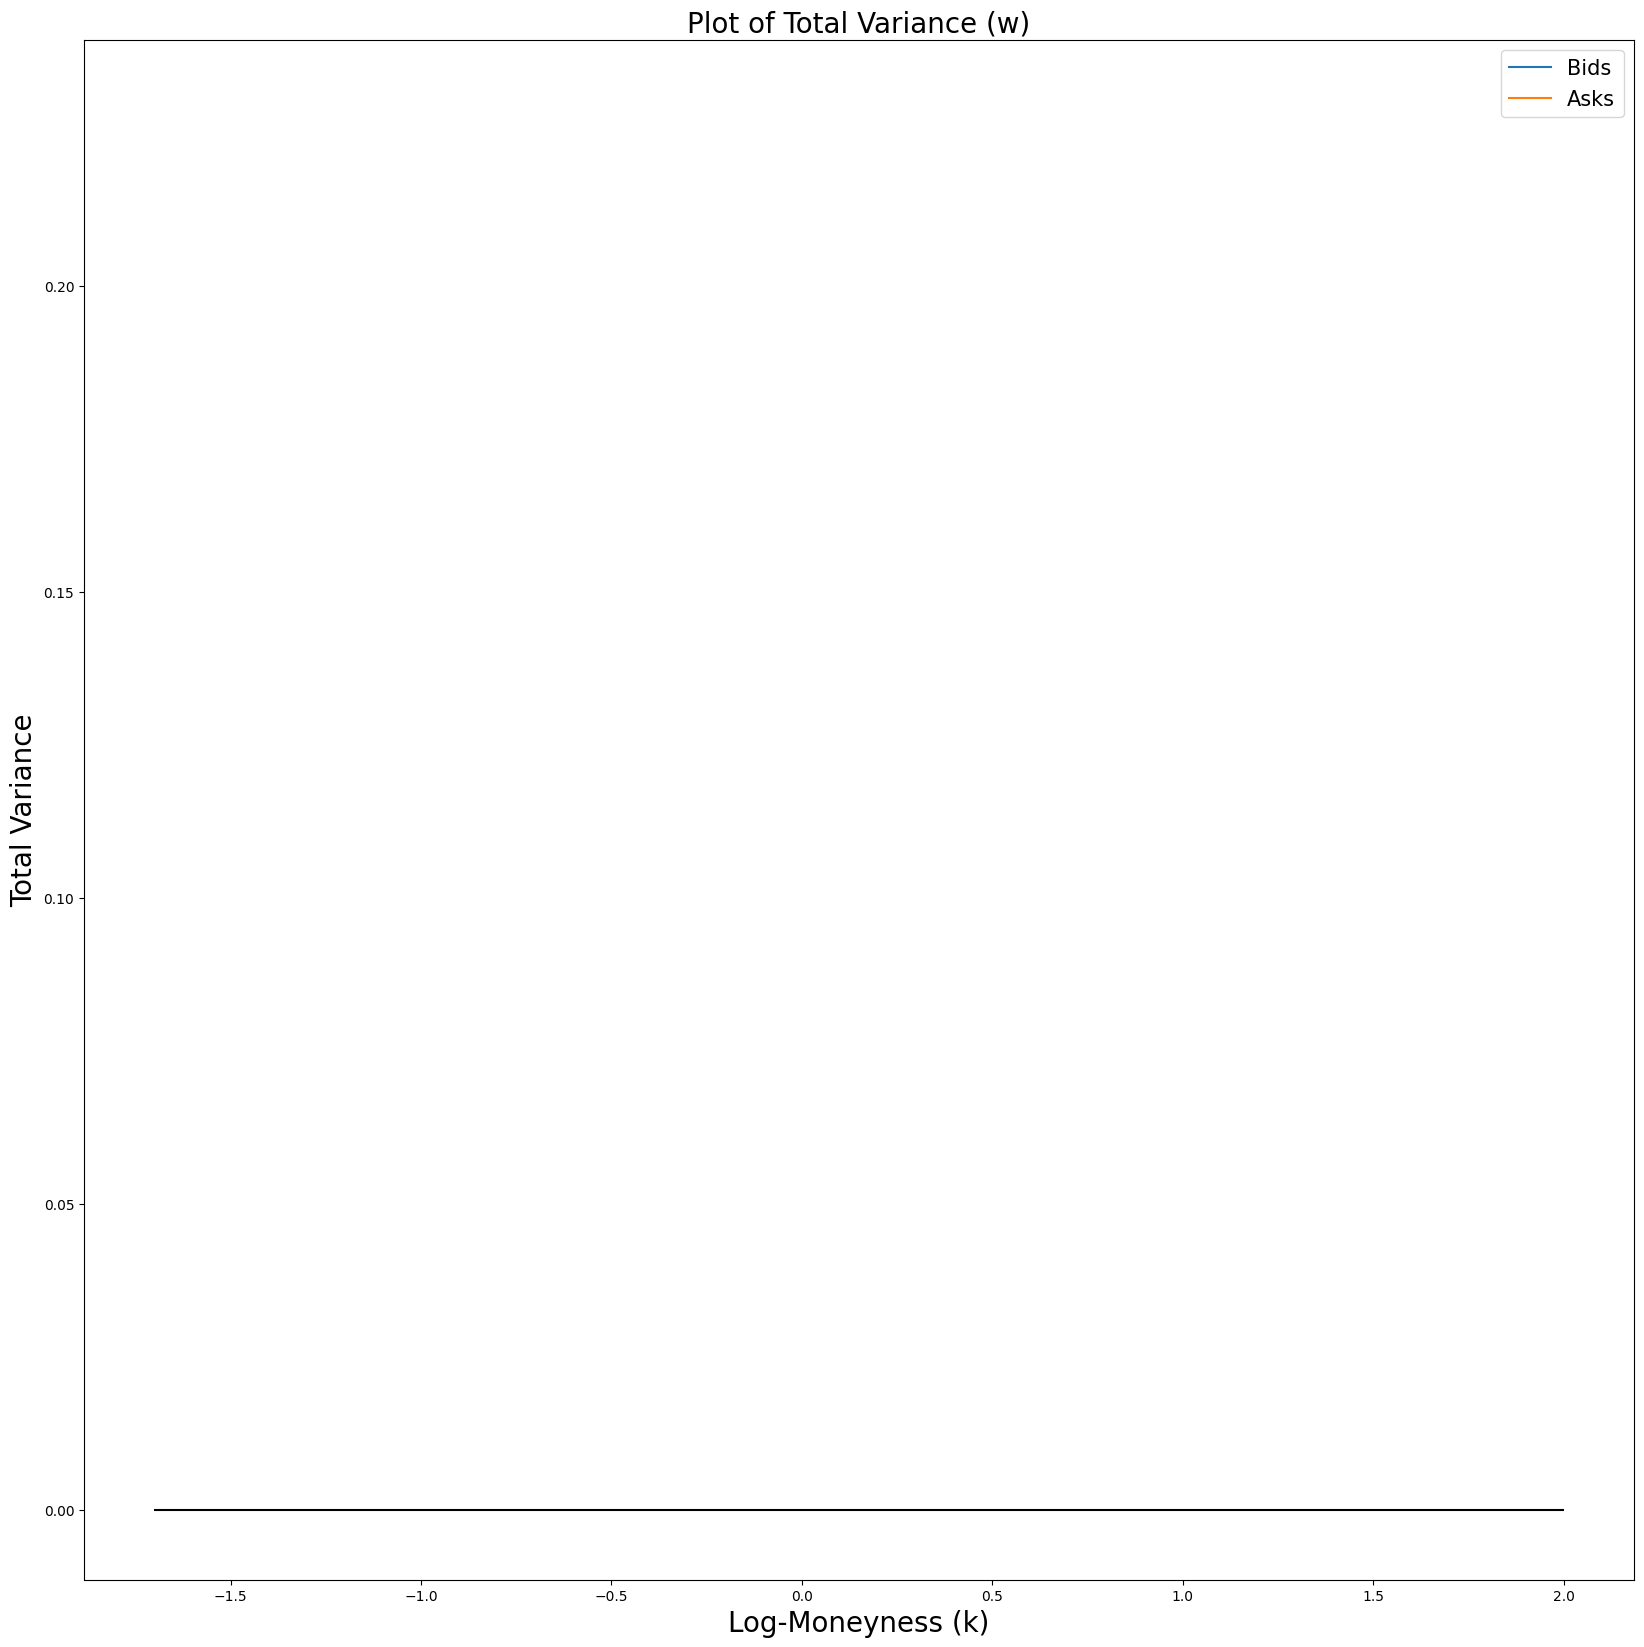

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
plt.plot(np.NaN, np.NaN, label='Bids')
plt.plot(np.NaN, np.NaN, label='Asks')
plt.plot([-1.7, 1.9333],[0,0.22876], alpha=0.0)
plt.hlines([0.0], xmin=-1.7, xmax=2, colors='black')
# plt.vlines([-1.7,])
plt.xlabel('Log-Moneyness (k)', fontsize=24)
plt.ylabel('Total Variance', fontsize=24)
plt.title('Plot of Total Variance (w)', fontsize=24)
plt.legend(loc='upper right', prop ={'size':15})
plt.savefig('func0_template.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


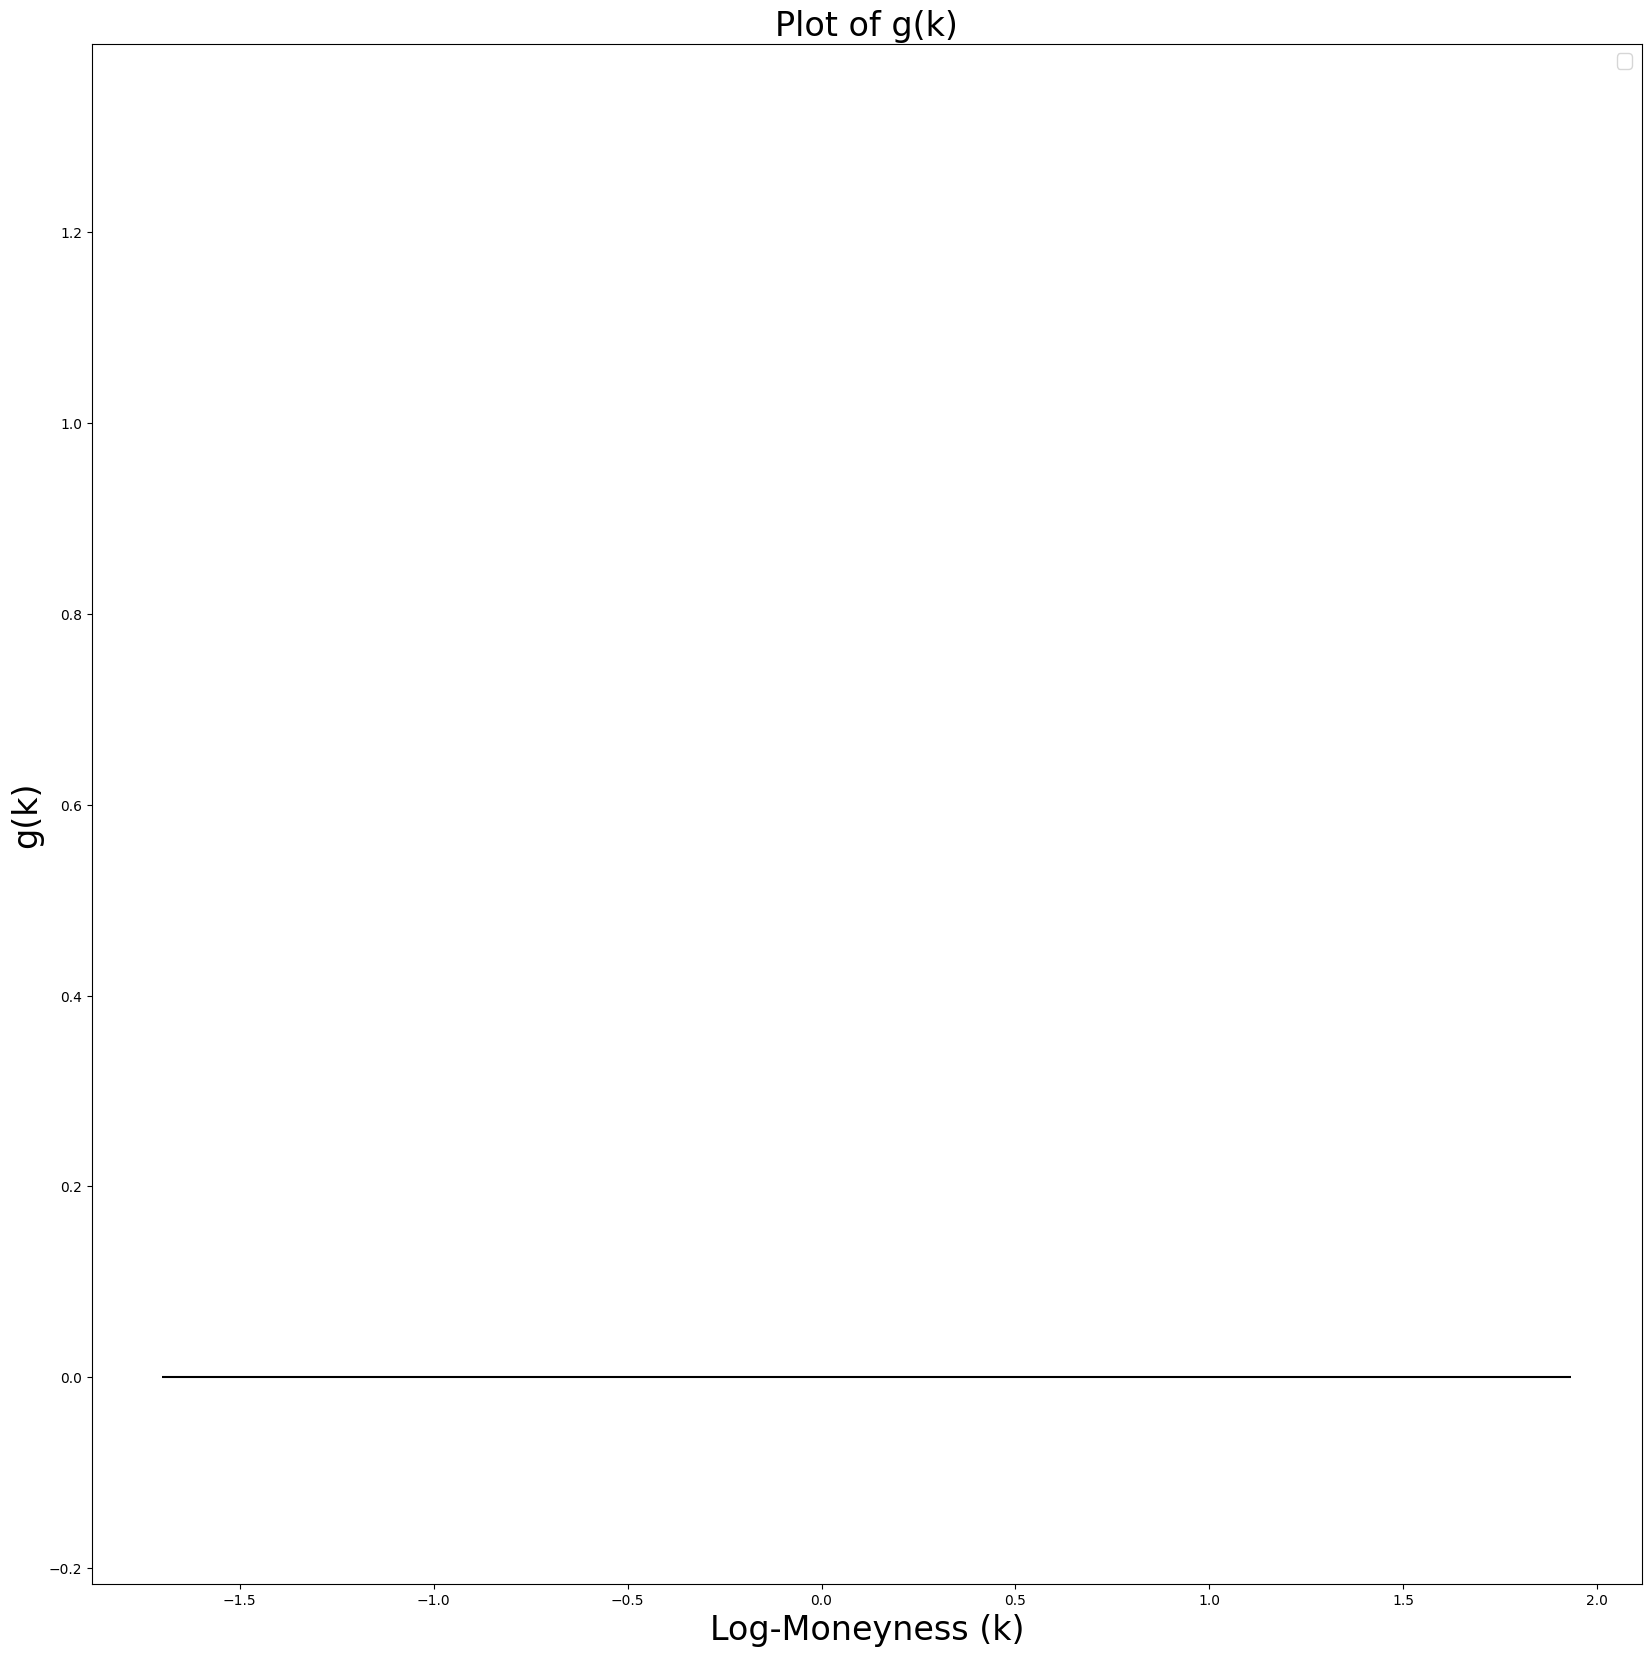

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
# plt.plot(np.NaN, np.NaN, label='Bids')
# plt.plot(np.NaN, np.NaN, label='Asks')
plt.plot([-1.7, 1.9333],[-0.14321,1.32439], alpha=0.0)
plt.hlines([0.0], xmin=-1.7, xmax=1.9333, colors='black')
# plt.vlines([-1.7,])
plt.xlabel('Log-Moneyness (k)', fontsize=24)
plt.ylabel('g(k)', fontsize=24)
plt.title('Plot of g(k)', fontsize=24)
plt.legend(loc='upper right', prop ={'size':14})
plt.savefig('tint0_template.png')


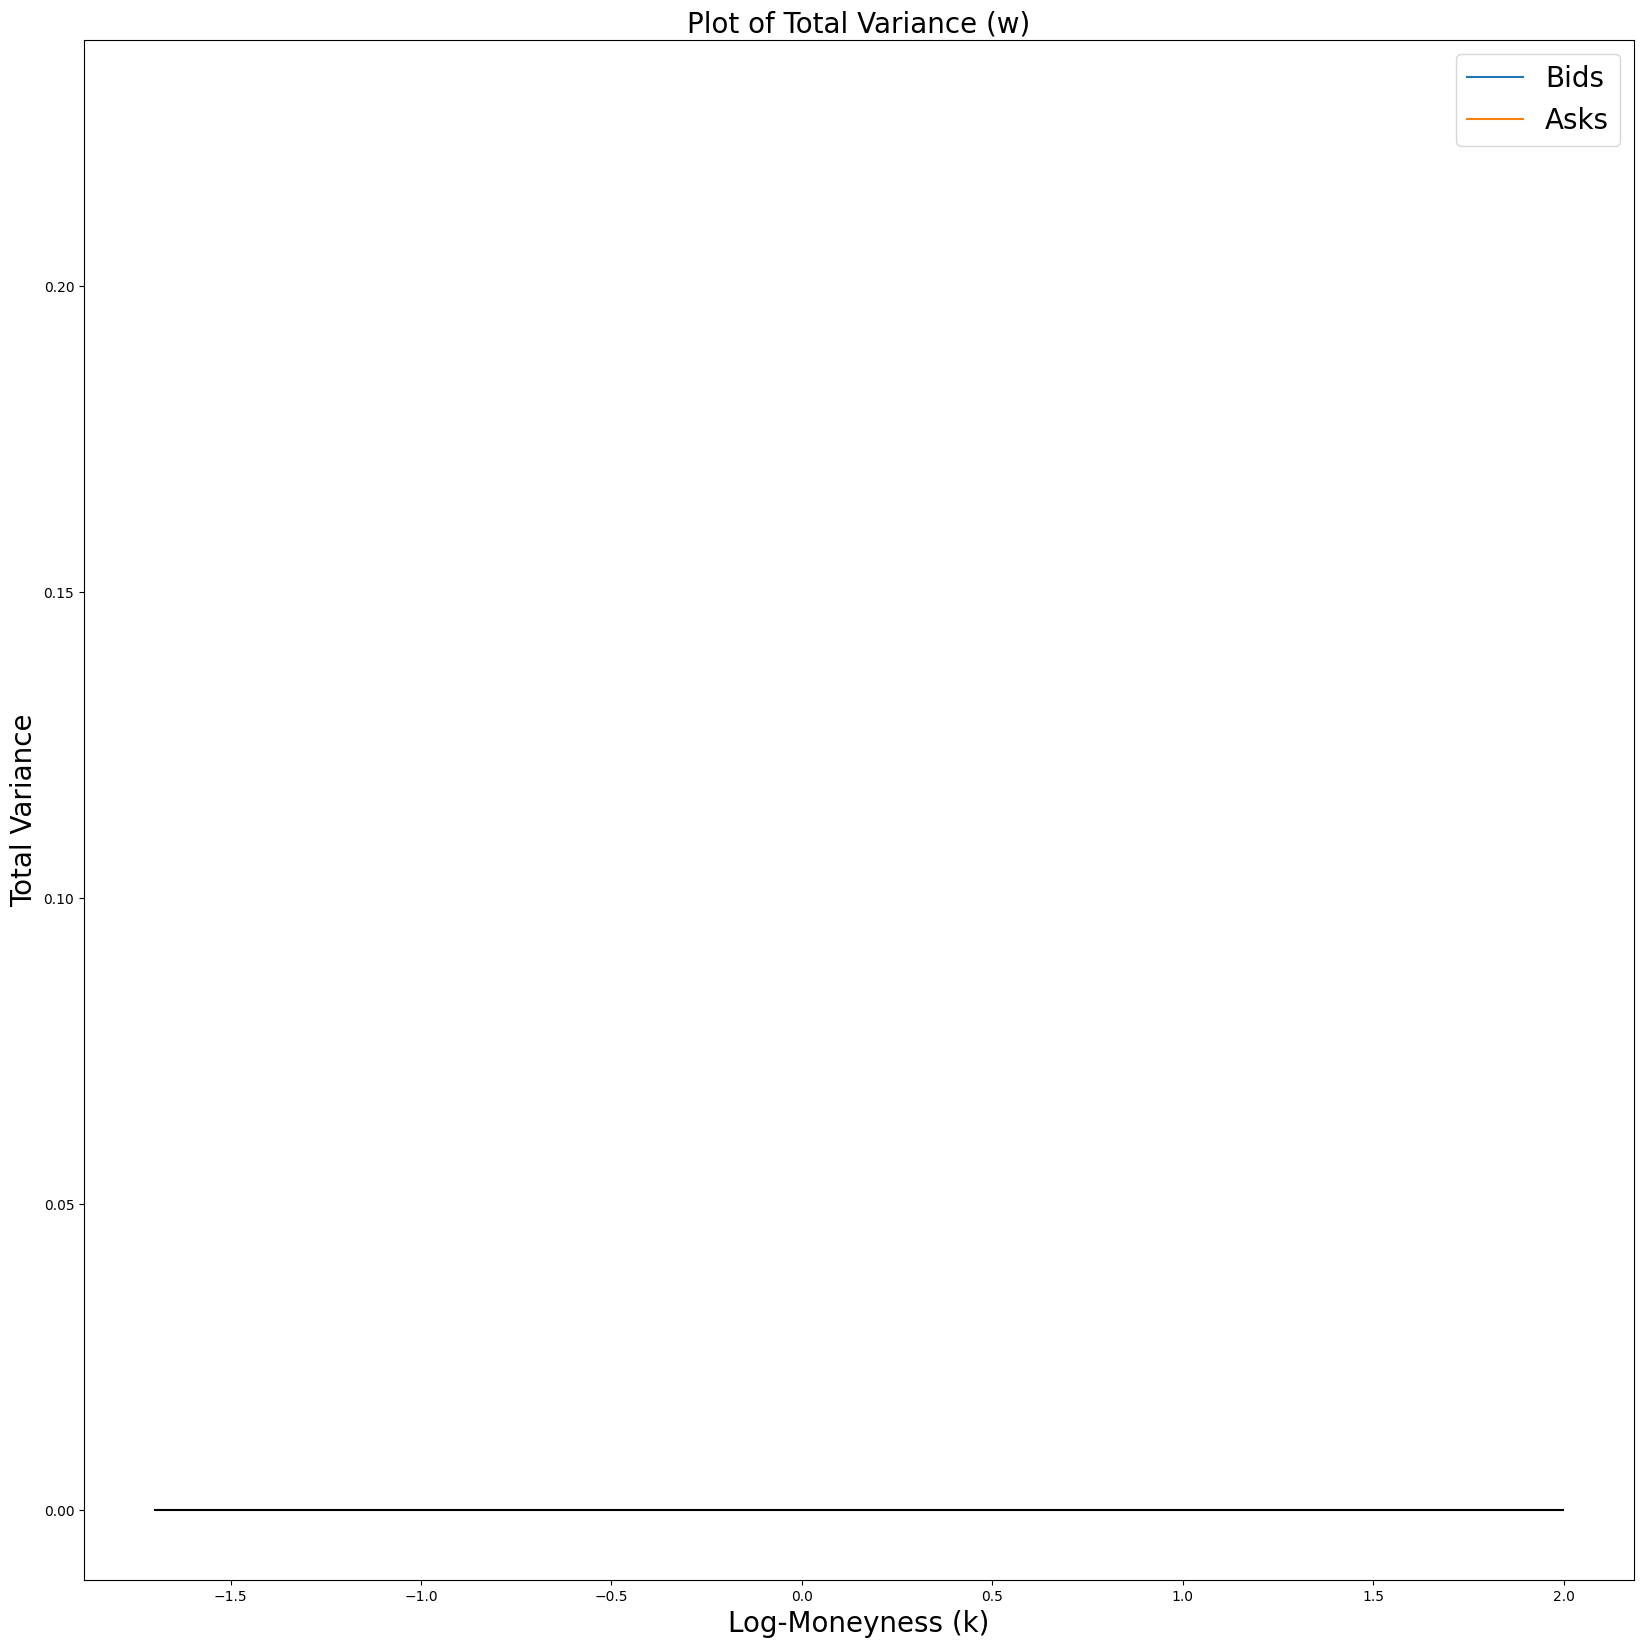

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
plt.plot(np.NaN, np.NaN, label='Bids')
plt.plot(np.NaN, np.NaN, label='Asks')
plt.plot([-1.7, 1.9333],[0,0.22876], alpha=0.0)
plt.hlines([0.0], xmin=-1.7, xmax=2, colors='black')
# plt.vlines([-1.7,])
plt.xlabel('Log-Moneyness (k)', fontsize=20)
plt.ylabel('Total Variance', fontsize=20)
plt.title('Plot of Total Variance (w)', fontsize=20)
plt.legend(loc='upper right', prop ={'size':20})
plt.savefig('func0_template.png')

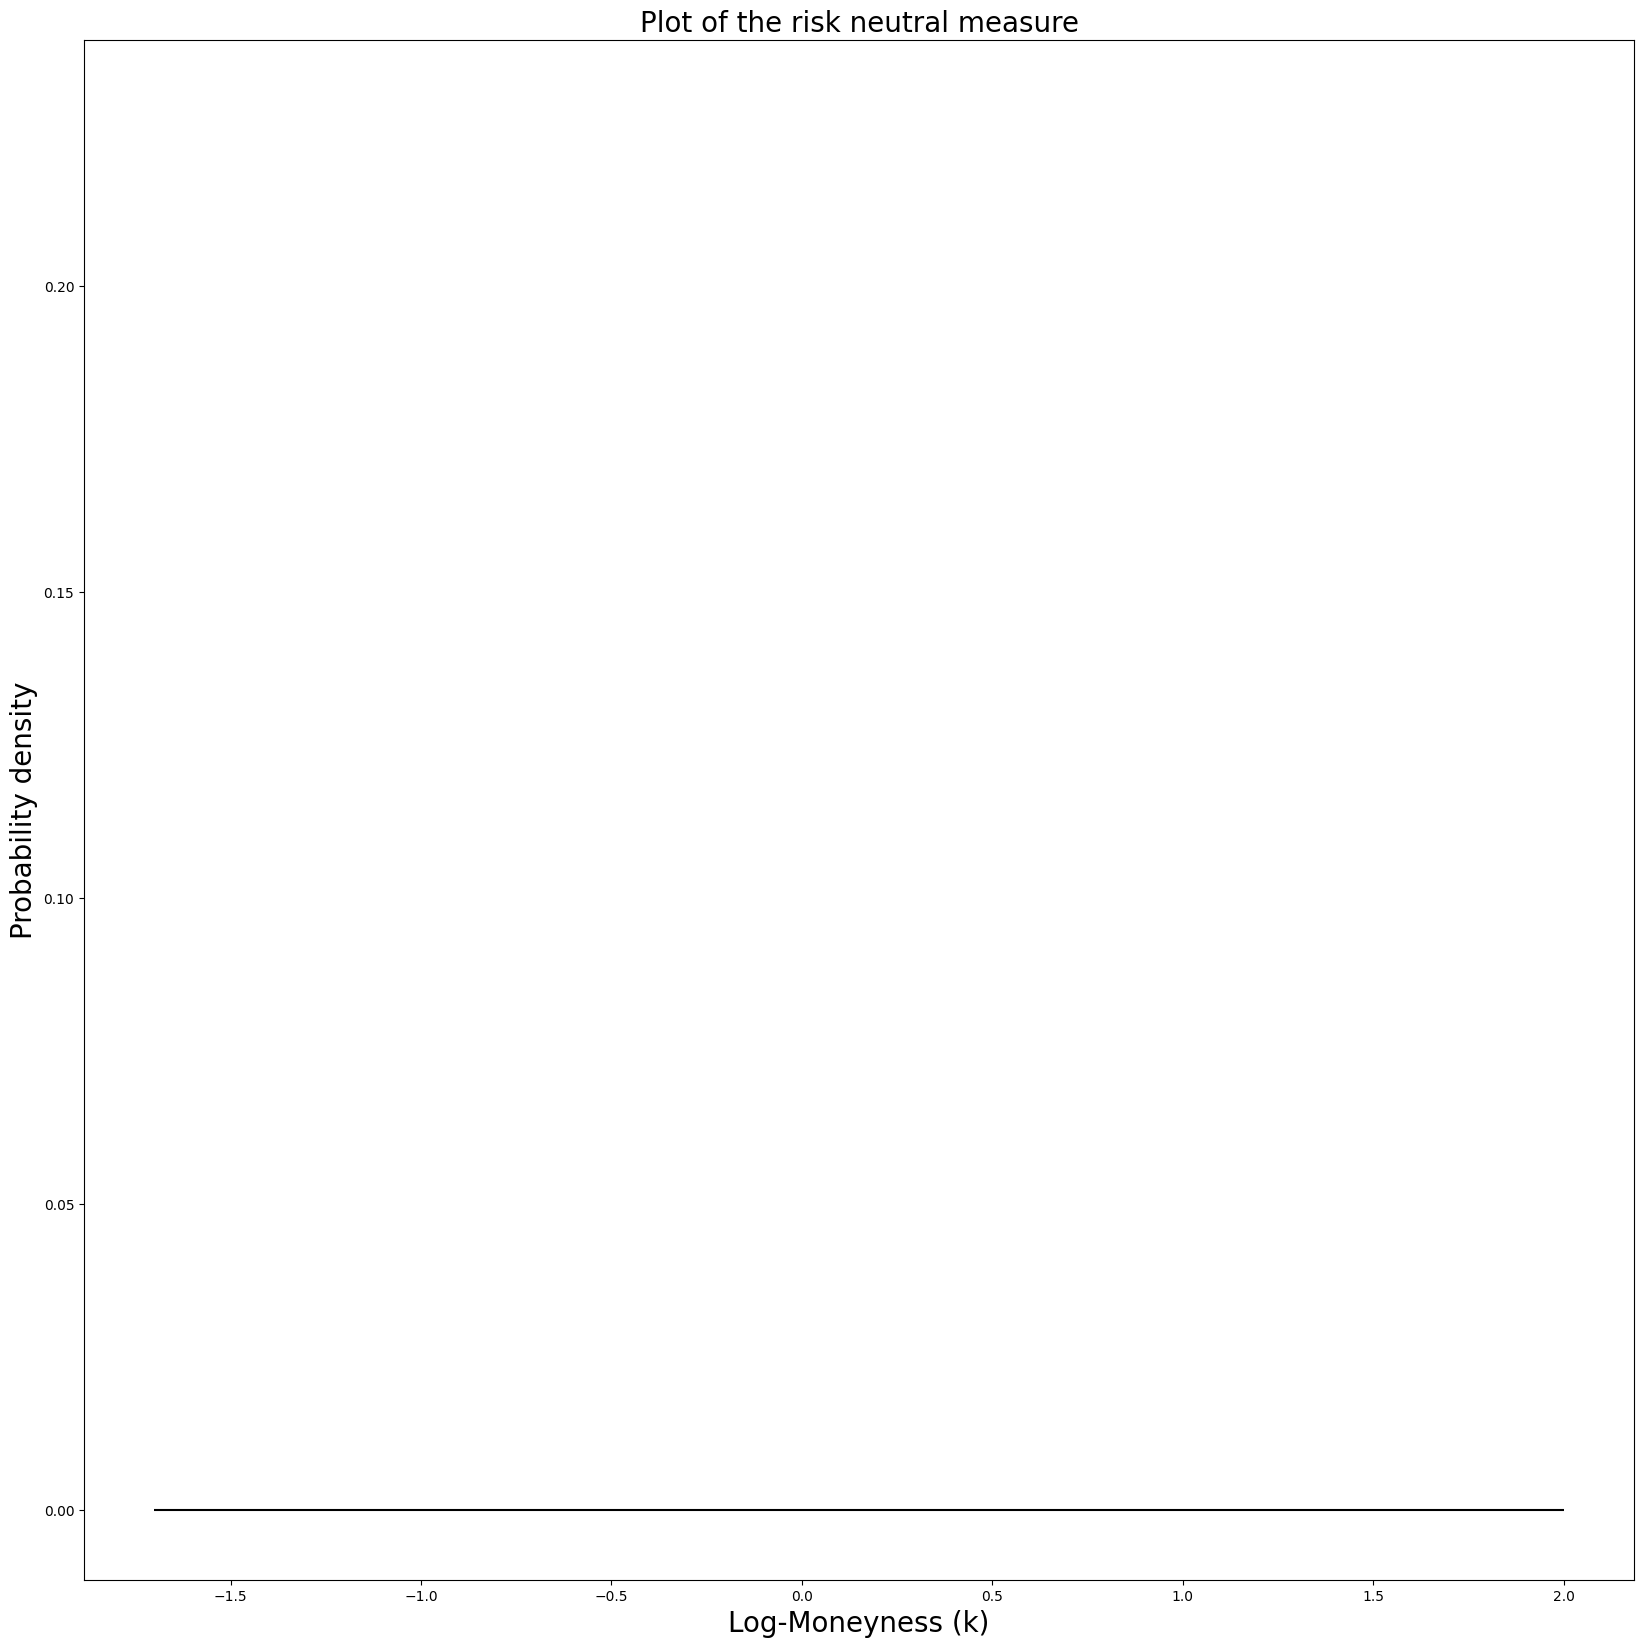

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
plt.plot([-1.7, 1.9333],[0,0.22876], alpha=0.0)
plt.hlines([0.0], xmin=-1.7, xmax=2, colors='black')
# plt.vlines([-1.7,])
plt.xlabel('Log-Moneyness (k)', fontsize=20)
plt.ylabel('Probability density', fontsize=20)
plt.title('Plot of the risk neutral measure', fontsize=20)
plt.savefig('rnm0_template.png')